In [3]:
from __future__ import division
import os
import re
import itertools
import community
from datetime import datetime, timedelta
from sklearn import preprocessing
import imblearn
from matplotlib.backends.backend_pdf import PdfPages

from imblearn.pipeline import Pipeline as imbPipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import ClusterCentroids
from imblearn.under_sampling import RandomUnderSampler
folder_directory =os.getcwd()
os.chdir(folder_directory)
execfile('python_libraries.py')
execfile('LINK.py')
execfile('parsing.py')  # Sam Way's Code
execfile('/mixing.py')   # Sam Way's Code
execfile('create_adjacency_matrix.py')
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'invalid': 'warn', 'over': 'warn', 'under': 'ignore'}

In [5]:
df_results= pd.read_csv('NEWRMesults.csv',sep=',')
df_results.head()

,mean_wt_LINK_RM,mean_wt_auc_x1_lbfgs,mean_wt_auc_x2_lbfgs,mean_wt_auc_x3_lbfgs,mean_wt_auc_xall_lbfgs,mean_wt_node2vec,se_wt_LINK_RM,se_wt_auc_x1,se_wt_auc_x2,se_wt_auc_x3,se_wt_auc_xall,se_wt_node2vec
0,0.997776,0.717135,0.814269,0.944562,0.954098,0.586073,0.002512,0.125525,0.106560,0.040304,0.036051,0.068033
1,0.998236,0.749206,0.858836,0.956384,0.965362,0.611605,0.002057,0.119886,0.035456,0.046794,0.038527,0.088497
2,0.999028,0.759236,0.860532,0.975486,0.976620,0.653056,0.001489,0.120708,0.033156,0.017641,0.016969,0.066380
3,0.998500,0.825500,0.897969,0.987125,0.991062,0.663594,0.002141,0.060051,0.036599,0.008641,0.007289,0.087944
4,0.999276,0.809231,0.888824,0.984118,0.988914,0.666833,0.001659,0.060174,0.062108,0.011301,0.015041,0.065118


In [6]:

percent_initially_unlabelled = [0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1,0.05]
percent_initially_labelled = np.subtract(1, percent_initially_unlabelled)


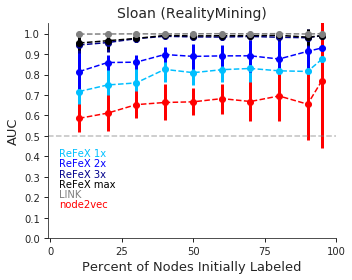

In [10]:
from matplotlib.backends.backend_pdf import PdfPages

alpha_empirical = 0.4

%matplotlib inline
nbins = 45
f, (ax1) = plt.subplots(1, 1, 
                    sharey=False, sharex=False,
                figsize=(5,4))#(5, 4))

plt.setp(ax1, xticks=[0,25,50,75,100])


ax1.set_xticks([0,25,50,75,100])
ax1.minorticks_on()
ax1.tick_params('both', length=4, width=1, which='major', left=1, bottom=1, top=0, right=0)

w = 1.5
width = 0.15
ax1.errorbar(percent_initially_labelled*100, df_results.mean_wt_auc_x1_lbfgs,
            yerr=df_results.se_wt_auc_x1, fmt='--o', capthick=2,
            alpha=1, elinewidth=3, color='deepskyblue')

ax1.errorbar(percent_initially_labelled*100, df_results.mean_wt_auc_x2_lbfgs,
    yerr=df_results.se_wt_auc_x2, fmt='--o', capthick=2,
    alpha=1, elinewidth=3, color='blue')
ax1.errorbar(percent_initially_labelled*100, df_results.mean_wt_auc_x3_lbfgs,
    yerr=df_results.se_wt_auc_x3, fmt='--o', capthick=2,
    alpha=1, elinewidth=3, color='darkblue')
ax1.errorbar(percent_initially_labelled*100, df_results.mean_wt_auc_xall_lbfgs,
    yerr=df_results.se_wt_auc_xall, fmt='--o', capthick=2,
    alpha=1, elinewidth=3, color='black')
ax1.errorbar(percent_initially_labelled*100, df_results.mean_wt_LINK_RM,
    yerr=df_results.se_wt_LINK_RM, fmt='--o', capthick=2,
    alpha=1, elinewidth=3, color='gray')

ax1.errorbar(percent_initially_labelled*100, df_results.mean_wt_node2vec,
    yerr=df_results.se_wt_node2vec, fmt='--o', capthick=2,
    alpha=1, elinewidth=3, color='red')



ax1.annotate('ReFeX 1x', xy=(3, 0.4), 
         color='deepskyblue', alpha=1, size=10)
ax1.annotate('ReFeX 2x', xy=(3, 0.35), 
         color='blue', alpha=1, size=10)
ax1.annotate('ReFeX 3x', xy=(3, 0.30), 
         color='darkblue', alpha=1, size=10)
ax1.annotate('ReFeX max', xy=(3, 0.25), 
         color='black', alpha=1, size=10)
ax1.annotate('LINK', xy=(3, 0.2), 
         color='gray', alpha=1, size=10)
ax1.annotate('node2vec', xy=(3, 0.15), 
         color='red', alpha=1, size=10)





ax1.set_ylabel('AUC', size=13)
ax1.set_xlabel('Percent of Nodes Initially Labeled', size=13)


#ax1.set_xlim(-1,np.max(np.array(range(len(acc_generic)))*w)+1)
ax1.set_ylim(0,1.05)
plt.yticks(np.arange(0,1.1,0.1))
ax1.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.set_xlim(-1,100)
plt.axhline(0.5, color='gray', linestyle='--', alpha = 0.5)


plt.title('Sloan (RealityMining)',fontsize=14)
plt.tight_layout()
#plt.show()


pp = PdfPages('../figs/neWwithin_auc_SIMODSNEW.pdf')
pp.savefig()
pp.close()